<a href="https://colab.research.google.com/github/arunkumanan/Task-1_Data-_Science-/blob/main/Sparks_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP@ The Sparks Foundation June-2021 Batch
# DOMAIN: Data Science and Business Analytics 
# **Name: A. ARUN KUMANAN**


TECHNICAL TASK 1 : PREDICTION USING SUPERVISED ML (LEVEL BEGINNER)
In this task we predict the percentage of a student based on the number of hours he/she studies. 



### IMPORTING REQUIRED LIBRARIES AND DATASET

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### DATA VISUALIZATION 

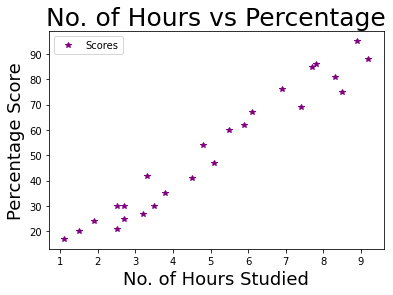

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',color='purple')  
plt.title('No. of Hours vs Percentage',color='black',size=25)  
plt.xlabel('No. of Hours Studied',color='black',size=18)  
plt.ylabel('Percentage Score',color='black',size=18)  
plt.show()

### DATA PREPATATION

In [ ]:
#dividing the data into "attributes" (inputs) and "labels" (outputs). Here attributes will be "hours" column and labels will be "scores" column
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [ ]:
# Spliting the dataset into TRAIN and TEST data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### TRAINING ALGORITHIM 

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

print("Training complete.")

Training complete.


In [ ]:
# Intercept and slope of the regrssion line
print(model.intercept_)
print(model.coef_)

2.018160041434662
[9.91065648]


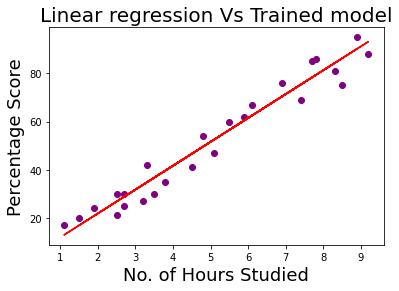

In [ ]:
# Plotting the Regression line
line = model.coef_*X+model.intercept_

plt.title("Linear regression Vs Trained model",size=20)
plt.scatter(X, y,color='purple')
plt.xlabel("No. of Hours Studied",size=18)
plt.ylabel("Percentage Score",size=18)
plt.plot(X, line,color='red')
plt.show()

### MAKING PREDICTIONS

In [ ]:
print(X_test) 
y_pred = model.predict(X_test) 
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### MODEL EVALUATION

In [ ]:
print('Mean Absolute Error is : ' ,metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error is : ' ,metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error is :' ,np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error is :  4.183859899002982
Mean Square Error is :  21.598769307217456
Root Mean Squared Error is : 2.0454485813637513


In [ ]:
from sklearn.metrics import r2_score
print('%s = %f' % ('R-Squared',r2_score(y_test,y_pred)))

R-Squared = 0.945491


In [ ]:
print("%s = %f" % ('Slope Coefficient_beta1', model.coef_))
print("%s = %f" % ('Intercept Coefficient_beta0', model.intercept_))

Slope Coefficient_beta1 = 9.910656
Intercept Coefficient_beta0 = 2.018160


INTERPRETATION:- The simple linear equation is **y = 2.018160041434662 + 9.91065648(x)** where "x" is the no of hours studied and "y" is the percentage score.

### SOlVING THE PROBLEM STATEMENT

In [ ]:
hours = 9.25

print("No of Hours studied = {}".format(hours))
print("Predicted Score = ")
print(model.predict([[hours]]))

No of Hours studied = 9.25
Predicted Score = 
[93.69173249]


### INTERPRETATION: If a student studies for 9.25 hours per day he/she will score 93.69%